# Lending Club Data Analysis

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)

%matplotlib inline

## 2. Loading Data

In [3]:
loans = pd.read_csv('loan.csv')

C:\Users\Chuck\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


## 3. Data Visualization

In [5]:
mpl.rcParams['agg.path.chunksize'] = 10000

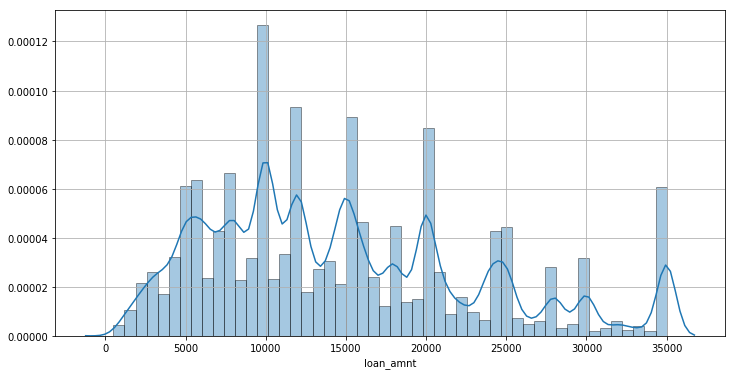

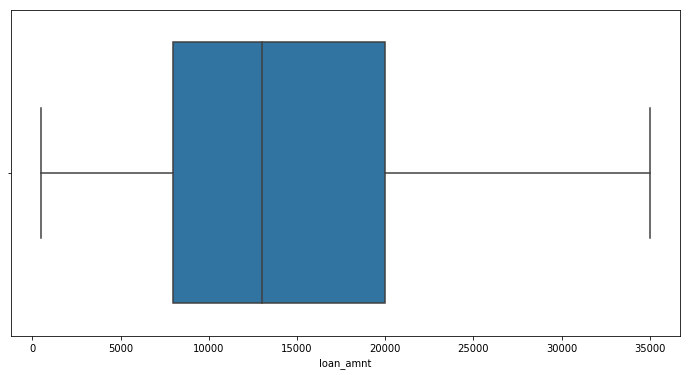

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(loans['loan_amnt'],hist_kws=dict(edgecolor="k", linewidth=1))
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_amnt',data=loans)

In [7]:
# setting issue_d as index
loans.set_index('issue_d', inplace=True)
# changing index (issue_d) to datetime (date-month-year-time) so that we can sort it
loans.index = pd.to_datetime(loans.index)
# sorting the columns
loans.sort_index(axis=1, inplace=True)

Text(0,0.5,'Loan Amount')

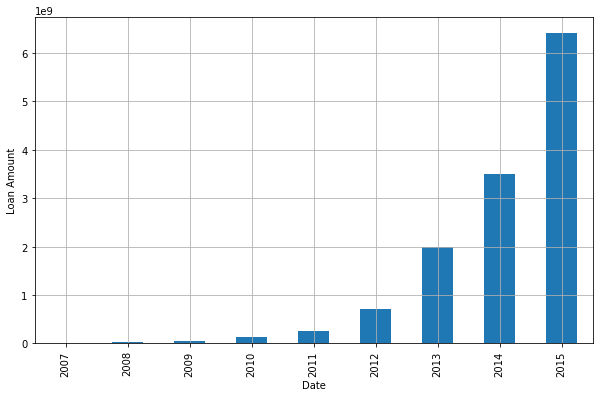

In [8]:
amount_by_year = loans.groupby(loans.index.year)['loan_amnt'].sum()
amount_by_year.plot(kind='bar', fontsize=10, figsize=(10,6), grid=True)
plt.xlabel('Date')
plt.ylabel('Loan Amount')

Text(0,0.5,'Loan Amount')

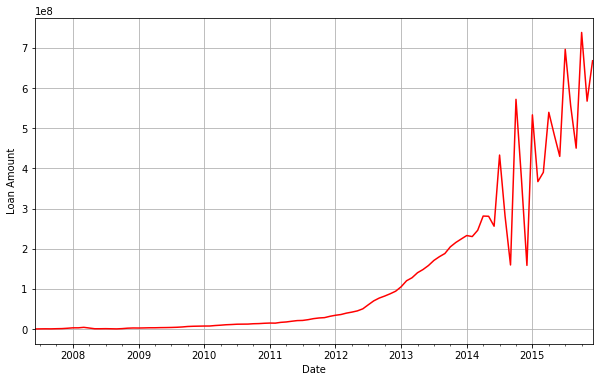

In [9]:
amount_by_time = loans.groupby(loans.index)['loan_amnt'].sum()
amount_by_time.plot(kind='line', c='r', fontsize=10, figsize=(10,6), grid=True)
plt.xlabel('Date')
plt.ylabel('Loan Amount')

Text(0,0.5,'Mean of Loan')

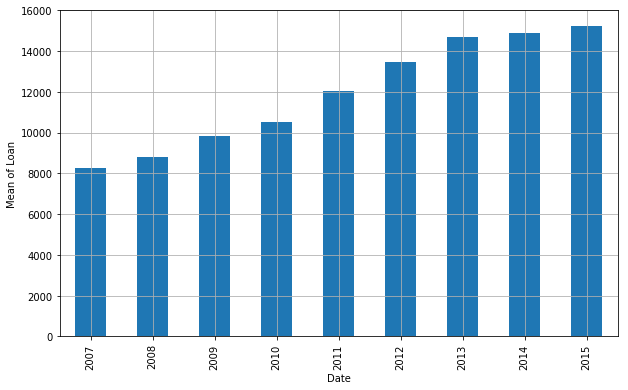

In [10]:
amount_by_time = loans.groupby(loans.index.year)['loan_amnt'].mean()
amount_by_time.plot(kind='bar', fontsize=10, figsize=(10,6), grid=True)
plt.xlabel('Date')
plt.ylabel('Mean of Loan')

Text(0,0.5,'Loan Amount')

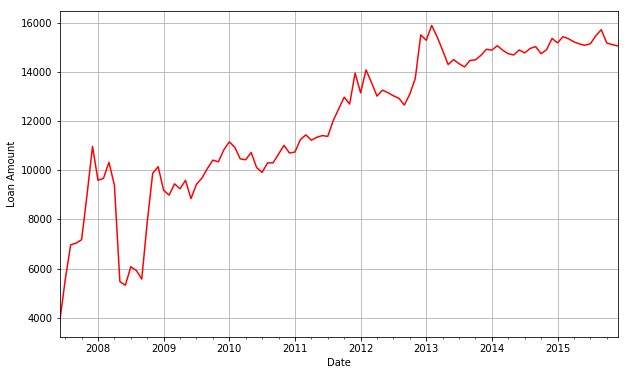

In [11]:
amount_by_time = loans.groupby(loans.index)['loan_amnt'].mean()
amount_by_time.plot(kind='line', c='r', fontsize=10, figsize=(10,6), grid=True)
plt.xlabel('Date')
plt.ylabel('Loan Amount')

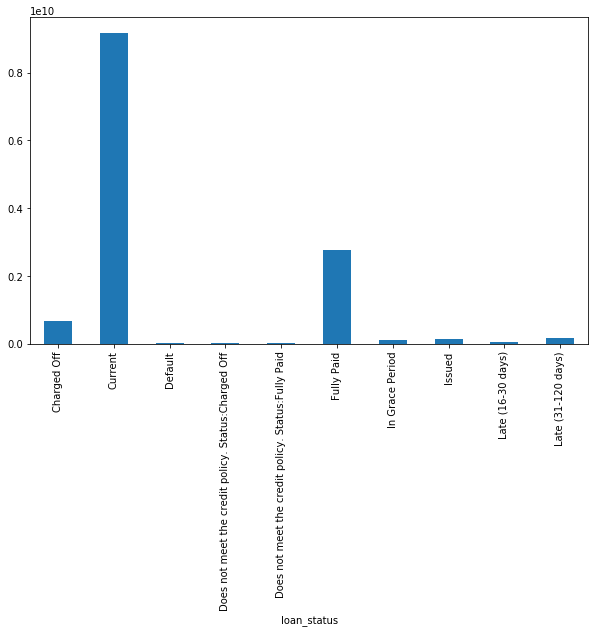

In [12]:
loan_amnt_status = loans.groupby('loan_status')['loan_amnt'].sum()
loan_amnt_status.plot(kind='bar', figsize=(10,6))

In [13]:
loan_amnt_status_sort = np.sort(loan_amnt_status)
loan_amnt_status_sort_pie = [loan_amnt_status_sort[-1],loan_amnt_status_sort[-2],loan_amnt_status_sort[:-2].sum()]
labels = 'Current', 'Fully Paied','Charged Off'

trace_sta = go.Pie(labels=labels, values=loan_amnt_status_sort_pie)
py.iplot([trace_sta], filename='Loan Amout by Status')

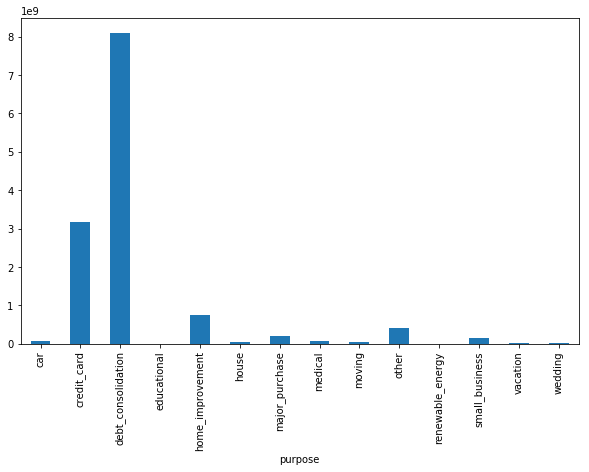

In [14]:
loan_amnt_purpose = loans.groupby('purpose')['loan_amnt'].sum()
loan_amnt_purpose.plot(kind='bar', figsize=(10,6))

In [15]:
loan_amnt_purpose_sort = np.sort(loan_amnt_purpose)
loan_amnt_purpose_sort_pie = [loan_amnt_purpose_sort[-1],loan_amnt_purpose_sort[-2],loan_amnt_purpose_sort[:-2].sum()]
labels_pur = 'Debt Consolidation', 'Credit Card','Other Purpose'

trace_pur = go.Pie(labels=labels_pur, values=loan_amnt_purpose_sort_pie)
py.iplot([trace_pur], filename='Loan Amout by Purpose')

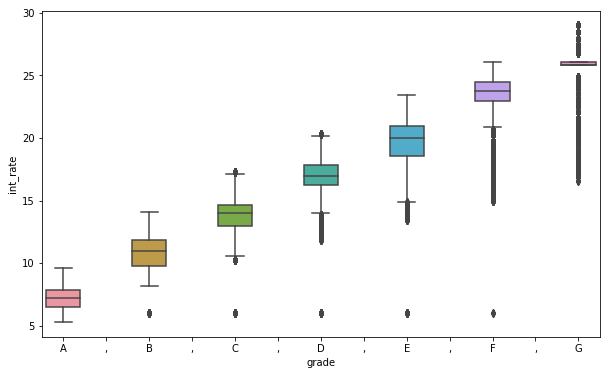

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='int_rate', data=loans, order='A,B,C,D,E,F,G')

In [17]:
loan_by_state = loans.groupby('addr_state')['loan_amnt'].sum()

In [18]:
loans.groupby('addr_state')['loan_amnt'].sum().head()

addr_state
AK    3.697805e+07
AL    1.646276e+08
AR    9.341608e+07
AZ    2.901101e+08
CA    1.898145e+09
Name: loan_amnt, dtype: float64

In [19]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [20]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [21]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states,
        z = loan_by_state,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

In [22]:
layout = dict(
        title = 'Loan Amount by State<br>(2007-2015)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [23]:
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## 4. Data Cleaning

In [24]:
loans.head()

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,...,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
issue_d,,,,,,,,,,,,,,,,,,,,,
2011-12-01,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/22/11 > I need to upgra...,...,5861.071414,5831.78,861.07,0.00,5000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,860xx
2011-12-01,0.0,GA,NaN,30000.0,NaN,INDIVIDUAL,1.11,0.0,0.0,Borrower added on 12/22/11 > I plan to use t...,...,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,309xx
2011-12-01,0.0,IL,NaN,12252.0,NaN,INDIVIDUAL,0.00,0.0,0.0,NaN,...,3003.653644,3003.65,603.65,0.00,2400.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Not Verified,NaN,606xx
2011-12-01,0.0,CA,NaN,49200.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/21/11 > to pay for prop...,...,12226.302212,12226.30,2209.33,16.97,10000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,917xx
2011-12-01,0.0,OR,NaN,80000.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/21/11 > I plan on combi...,...,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,972xx


In [25]:
check_null = loans.isnull().sum(axis=0)/float(len(loans))
check_null[check_null>0.6]

all_util                       0.975916
annual_inc_joint               0.999424
desc                           0.857976
dti_joint                      0.999426
il_util                        0.979020
inq_fi                         0.975916
inq_last_12m                   0.975916
max_bal_bc                     0.975916
mths_since_last_major_derog    0.750160
mths_since_last_record         0.845553
mths_since_rcnt_il             0.976549
open_acc_6m                    0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
open_il_6m                     0.975916
open_rv_12m                    0.975916
open_rv_24m                    0.975916
total_bal_il                   0.975916
total_cu_tl                    0.975916
verification_status_joint      0.999424
dtype: float64

In [26]:
loans.drop(check_null[check_null>0.5].index, axis=1, inplace=True) 

In [27]:
loans.head()

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,zip_code
issue_d,,,,,,,,,,,,,,,,,,,,,
2011-12-01,0.0,AZ,24000.0,INDIVIDUAL,0.00,0.0,0.0,27.65,Jan-1985,10+ years,...,9.0,5861.071414,5831.78,861.07,0.00,5000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Verified,860xx
2011-12-01,0.0,GA,30000.0,INDIVIDUAL,1.11,0.0,0.0,1.00,Apr-1999,< 1 year,...,4.0,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,309xx
2011-12-01,0.0,IL,12252.0,INDIVIDUAL,0.00,0.0,0.0,8.72,Nov-2001,10+ years,...,10.0,3003.653644,3003.65,603.65,0.00,2400.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Not Verified,606xx
2011-12-01,0.0,CA,49200.0,INDIVIDUAL,0.00,0.0,0.0,20.00,Feb-1996,10+ years,...,37.0,12226.302212,12226.30,2209.33,16.97,10000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,917xx
2011-12-01,0.0,OR,80000.0,INDIVIDUAL,0.00,0.0,0.0,17.94,Jan-1996,1 year,...,38.0,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,972xx


In [28]:
loans.columns

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'total_rev_hi_lim', 'url', 'verification_status',
       'zip_code'],
      dtype='object')

In [29]:
drop_columns = ['acc_now_delinq', 'addr_state', 'application_type',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'earliest_cr_line', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'id',
       'initial_list_status', 'installment', 
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 
       'member_id', 'next_pymnt_d', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan',
       'recoveries', 'revol_util', 'sub_grade', 'title',
       'tot_coll_amt', 'tot_cur_bal', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'total_rev_hi_lim', 'url', 
       'zip_code']

In [30]:
loans.drop(drop_columns , axis=1, inplace=True)

In [31]:
loans.head()

,annual_inc,delinq_2yrs,dti,emp_length,home_ownership,inq_last_6mths,int_rate,loan_amnt,loan_status,open_acc,revol_bal,term,total_acc,verification_status
issue_d,,,,,,,,,,,,,,
2011-12-01,24000.0,0.0,27.65,10+ years,RENT,1.0,10.65,5000.0,Fully Paid,3.0,13648.0,36 months,9.0,Verified
2011-12-01,30000.0,0.0,1.00,< 1 year,RENT,5.0,15.27,2500.0,Charged Off,3.0,1687.0,60 months,4.0,Source Verified
2011-12-01,12252.0,0.0,8.72,10+ years,RENT,2.0,15.96,2400.0,Fully Paid,2.0,2956.0,36 months,10.0,Not Verified
2011-12-01,49200.0,0.0,20.00,10+ years,RENT,1.0,13.49,10000.0,Fully Paid,10.0,5598.0,36 months,37.0,Source Verified
2011-12-01,80000.0,0.0,17.94,1 year,RENT,0.0,12.69,3000.0,Current,15.0,27783.0,60 months,38.0,Source Verified


## 5. Feature Engeneering

In [32]:
loans['term'] = loans['term'].str.split(' ').str[1]

In [34]:
loans['emp_length'] = loans['emp_length'].str.extract('(\d+)').astype(float)
loans['emp_length'] = loans['emp_length'].fillna(loans.emp_length.median())
loans.dropna(axis=0, inplace=True)

C:\Users\Chuck\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [36]:
loans['delinq_2yrs_cat'] = 0
loans.loc[loans['delinq_2yrs']> 0,'delinq_2yrs_cat'] = 1

In [38]:
loans['acc_ratio'] = loans.open_acc / loans.total_acc

In [40]:
loans_clean = loans.loc[loans.loan_status != 'Current']

,annual_inc,delinq_2yrs,dti,emp_length,home_ownership,inq_last_6mths,int_rate,loan_amnt,loan_status,open_acc,revol_bal,term,total_acc,verification_status,delinq_2yrs_cat,acc_ratio
issue_d,,,,,,,,,,,,,,,,
2011-12-01,24000.0,0.0,27.65,10.0,RENT,1.0,10.65,5000.0,Fully Paid,3.0,13648.0,36,9.0,Verified,0,0.333333
2011-12-01,30000.0,0.0,1.00,1.0,RENT,5.0,15.27,2500.0,Charged Off,3.0,1687.0,60,4.0,Source Verified,0,0.750000
2011-12-01,12252.0,0.0,8.72,10.0,RENT,2.0,15.96,2400.0,Fully Paid,2.0,2956.0,36,10.0,Not Verified,0,0.200000
2011-12-01,49200.0,0.0,20.00,10.0,RENT,1.0,13.49,10000.0,Fully Paid,10.0,5598.0,36,37.0,Source Verified,0,0.270270
2011-12-01,36000.0,0.0,11.20,3.0,RENT,3.0,7.90,5000.0,Fully Paid,9.0,7963.0,36,12.0,Source Verified,0,0.750000


In [42]:
full_paied = (loans_clean.loan_status == 'Fully Paid')
loans_clean['Y'] = 0
loans_clean.loc[full_paied, 'Y'] = 1

C:\Users\Chuck\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Chuck\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [44]:
loans_clean.columns

Index(['annual_inc', 'delinq_2yrs', 'dti', 'emp_length', 'home_ownership',
       'inq_last_6mths', 'int_rate', 'loan_amnt', 'loan_status', 'open_acc',
       'revol_bal', 'term', 'total_acc', 'verification_status',
       'delinq_2yrs_cat', 'acc_ratio', 'Y'],
      dtype='object')

In [45]:
cat_feats = ['home_ownership', 'verification_status']
final_data = pd.get_dummies(loans_clean,columns=cat_feats,drop_first=True)

In [1]:
final_data.head()

NameError: name 'final_data' is not defined

## 6. Data Modeling

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = final_data.drop(['loan_status', 'Y'],axis=1)
y = final_data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.47      0.00      0.00     23341
          1       0.73      1.00      0.84     62331

avg / total       0.66      0.73      0.61     85672



In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=1000)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
predictions = rfc.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.58      0.16      0.25     23341
          1       0.75      0.96      0.84     62331

avg / total       0.71      0.74      0.68     85672



In [60]:
print(confusion_matrix(y_test,predictions))

[[ 3802 19539]
 [ 2762 59569]]
